<a href="https://colab.research.google.com/github/nicolycosta/FuncaodeCorrelacaoeCovariancia-emAndamento-/blob/main/Covariance_and_Correlation_Matrix_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("Base.xlsx")
df = df.set_index('Mês')
df.head(5)

,ICMS- Pará,IPCA - Núm índice
Mês,,
2004-01-01,2.080399e+08,2246.43
2004-02-01,1.887688e+08,2260.13
2004-03-01,1.593895e+08,2270.75
2004-04-01,1.749718e+08,2279.15
2004-05-01,1.973934e+08,2290.77


In [ ]:
#Tornando a série em estacionária
df = df.diff().dropna()
df.head(5)

,ICMS- Pará,IPCA - Núm índice
Mês,,
2004-02-01,-19271095.42,13.70
2004-03-01,-29379308.75,10.62
2004-04-01,15582287.73,8.40
2004-05-01,22421587.15,11.62
2004-06-01,-5414707.06,16.26


# Covariância(X,Y) e Autocovariância

In [ ]:
def Covariancia(x,y):
    
    from statistics import mean
    import pandas as pd
    import numpy as np
    import warnings    
    warnings.filterwarnings('ignore')
    
    #adjusting a base
    data = np.array([x.values, y.values])
    Cal= pd.DataFrame(data)
    Cal = Cal.T 
    Cal.columns=['X', 'Y']
    Cal['Covx']= 'NaN'
    Cal['Covy']= 'NaN'

    #mean x and y 
    meanx= mean(Cal['X'])
    meany= mean(Cal['Y'])

    position = 0
    for value in Cal['Covx']:
        Cal['Covx'][position] = (Cal['X'][position] - meanx) # (x-μx)
        position = position + 1
    position = 0
    for value in Cal['Covy']:
        Cal['Covy'][position] = Cal['Y'][position] - meany # (y-μy)
        position = position + 1

    
    Cal['Covx*Covy'] = Cal['Covx']*Cal['Covy'] #(x-μx)(y-μy)
    covxy = mean(Cal['Covx*Covy']) # E(x-μx)(y-μy)
    covx = mean(Cal['Covx']*Cal['Covx']) # E(x-μx)(x-μx)
    covy = mean(Cal['Covy']*Cal['Covy']) # E(y-μy)(y-μy)

    print()
    print('Covariância cruzada: ')
    print(f'                  {covxy}')
    print()
    print('Auto-Covariância do X: ')
    print(f'                  {covx}')
    print()
    print('Auto-Covariância do Y: ')
    print(f'                  {covy}')

In [ ]:
Covariancia(df['ICMS- Pará'],df['IPCA - Núm índice '])


Covariância cruzada: 
                  -60215244.21757942

Auto-Covariância do X: 
                  4210569642576162.0

Auto-Covariância do Y: 
                  182.93852883862505


#### Matriz de Covariância (função pronta)

In [ ]:
numpy.cov(df['ICMS- Pará'], df['IPCA - Núm índice '])

array([[ 4.23081277e+15, -6.05047406e+07],
       [-6.05047406e+07,  1.83818041e+02]])

# Correlação e Autocorrelação (X,Y)



## Autocorrelação

In [171]:
def Correlacaocruzada (x,y,lags = 30): #não conisgo resolver a situação do lag 1.

    import matplotlib.pyplot as plt
    from statistics import mean
    import numpy as np
    
    listcorrelacao = []
    listautocorrelacaox = []
    listautocorrelacaoy = []
    lags = lags + 1 
    k = list(range(2,lags))
    
    for lag in k:
        data = np.array([x.values, y.values])
        Cal= pd.DataFrame(data)
        Cal = Cal.T 
        Cal.columns=['X', 'Y']

        Cal['Corx']= 'NaN'
        Cal['Cory']= 'NaN'
        Cal['Corylag0']= 'NaN'
        Cal['Corxlag']= 'NaN'
        meanx= mean(x)
        meany= mean(y)

        #X
        line= 0
        for value in Cal['Corx']: #iterrow
            Cal['Corx'][line] = (x[line] - meanx) # [X(i,t) - µ(i)]
            line = line + 1

        #Y
        line = 0
        lenn = round(len(y)/lag) #for odd number
        while line <= lenn:
            Cal['Cory'][line] = y[line+lag] - meany # [Y(t + k) - µ(y)]
            line = line + 1
    
        #Covariância cruzada (Yxy)   
        Cal['Corx*Cory'] = Cal['Corx'][0:lenn]*Cal['Cory'][0:lenn] #[X(i,t) - µ(i)][Y(i,t+k) - µ(i)]
        corxy = mean(Cal['Corx*Cory'].dropna()) # E [[X(i,t) - µ(i)][Y(i,t+k) - µ(i)]]
    
        #Auto Covariância (Yxx)
        corx = mean(Cal['Corx']*Cal['Corx']) # E[X(t) - µ(x)][X(t) - µ(x)]
    
        #Auto Covariância (Yyy)
        line = 0
        for j in Cal['Corylag0']:
            Cal['Corylag0'][line] = y[line] - meany # [Y(t) - µ(y)]
            line = line + 1
        cory = mean(Cal['Corylag0']*Cal['Corylag0']) # E [Y(t) - µ(y)][Y(t) - µ(y)]

        listcorrelacao.append(corxy/((corx*cory)**(1/2)))

        #AutocorralacaodeX
          # I already have [X(t) - µ(x)], now i need [X(t+ k) - µ(x)]
        line = 0
        lenn = round(len(x)/lag) #for odd number
        while line <= lenn:
           Cal['Corxlag'][line] = x[line+lag] - meanx # [Y(t+ k) - µ(y)]
           line = line + 1
        Cal['Corx*Corxlag'] = mean(Cal['Corx'][0:lenn]*Cal['Corxlag'][0:lenn]) #[X(t) - µ(x)][X(t+k) - µ(x)]   
        Corxlag = mean(Cal['Corx*Corxlag'].dropna())
        listautocorrelacaox.append(Corxlag/((corx*corx)**(1/2)))

        #AutocorralacaodeY
          # I already have [Y(t) - µ(y)] and [Y(t+ k) - µ(y)], so
        a= mean(Cal['Corylag0'][0:lenn]*Cal['Cory'][0:lenn]) #[Y(t) - µ(y)]*[Y(t+ k) - µ(y)]
        listautocorrelacaoy.append((a/cory)**(1/2)) 

    # Plotando
    plt.figure(figsize = (21, 7))

    ax=  plt.subplot(1,2,1)
    ax.stem(listautocorrelacaox)
    plt.title('Função de Autocorrelação de x', fontsize=16)

    ax1 = plt.subplot(1,2,2)
    ax1.stem(listcorrelacao)
    plt.title('Função de Correlação Cruzada', fontsize=16)

    plt.figure(figsize = (21, 7))
    ax2 = plt.subplot(1,2,1)
    ax2.stem(listcorrelacao)
    plt.title('Função de Correlação Cruzada', fontsize=16)

    ax3 = plt.subplot(1,2,2)
    ax3.stem(listautocorrelacaoy)
    plt.title('Função de Autocorrelação de y', fontsize=16)

    plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to b

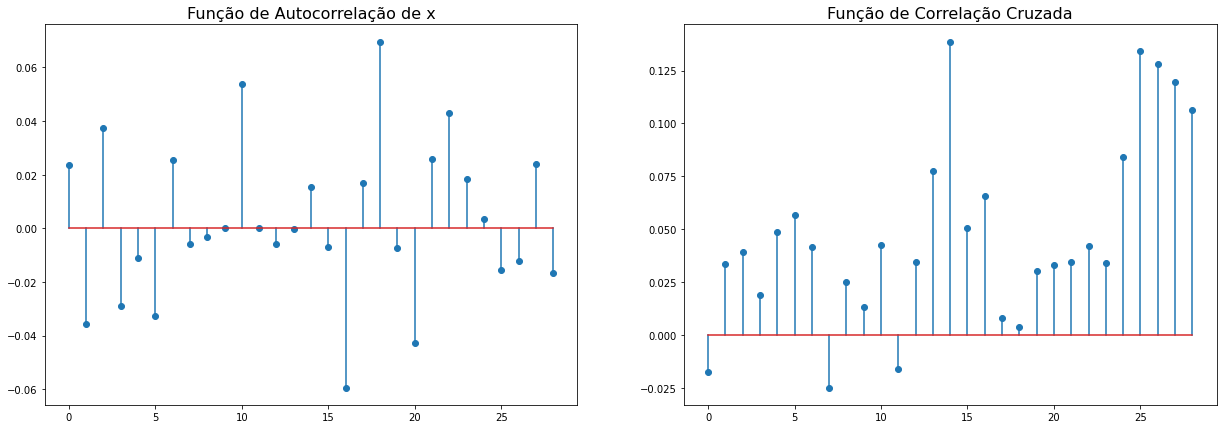

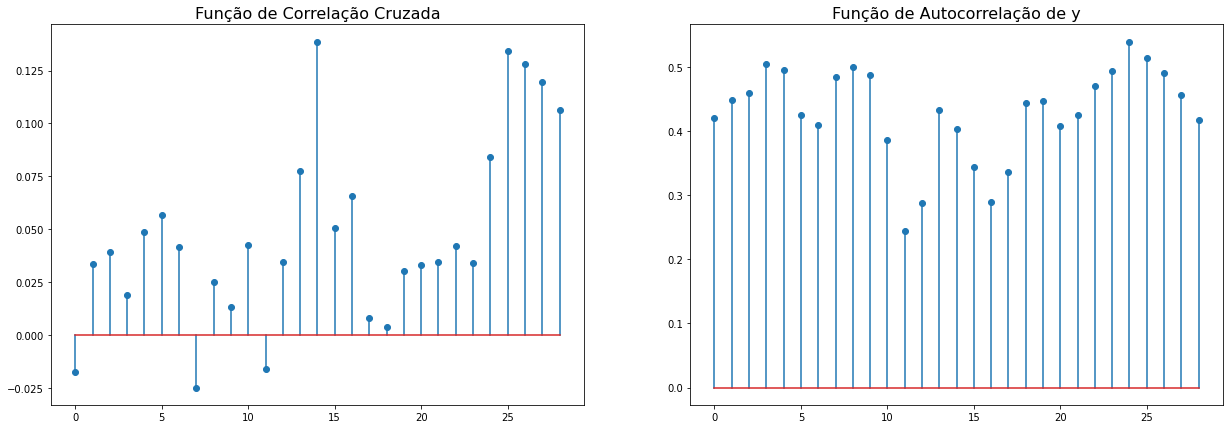

In [172]:
Correlacaocruzada(df['ICMS- Pará'],df['IPCA - Núm índice '], 30)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.01125199,  0.0439077 ,  0.06051231,  0.10494121,  0.16939682,
         0.16760136,  0.10571972,  0.12696834,  0.09458858,  0.07711073,
         0.02898367,  0.03413548, -0.0196984 , -0.00528679,  0.04114641,
         0.02258434,  0.18840982,  0.19704555,  0.16665082,  0.11582096,
         0.04844502]),
 <matplotlib.lines.Line2D at 0x7f5033670810>)

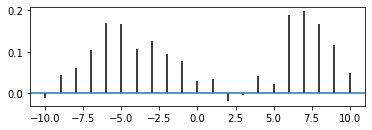

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.xcorr(df['ICMS- Pará'], df['IPCA - Núm índice '])